# 3 线性代数

## 3.1 标量、向量、矩阵、张量


In [2]:
#标量
import torch
x = torch.tensor([3])
y = torch.tensor([2])
x + y, x * y, x / y, x ** y

(tensor([5]), tensor([6]), tensor([1.5000]), tensor([9]))

In [6]:
#向量
x = torch.arange(4)
x, x[3], len(x), x.shape

(tensor([0, 1, 2, 3]), tensor(3), 4, torch.Size([4]))

In [12]:
#矩阵
A = torch.arange(20).view(5, 4)
print(A)
print(A.T)  #转置

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])


In [11]:
#对称矩阵：B=B.T，沿对角线对称
B = torch.tensor([[1,2,3], [2,0,4], [3,4,5]])
print(B)
print(B == B.T)

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [16]:
#张量
x = torch.arange(24).reshape(2, 3, 4)
x, x + 2

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]))

In [27]:
#给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [15]:
#两个矩阵的按元素乘法称为哈达玛积（Hadamard product）（数学符号 ⊙ ）
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

## 3.2 降维
默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。
以矩阵为例，为了通过求和所有行的元素来降维（轴0），我们可以在调用函数时指定axis=0。

In [28]:
#由于输入矩阵沿0轴降维以生成输出向量，因此输入的轴0的维数在输出形状中丢失。
A0 = A.sum(axis=0)  #一行
A0, A0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [20]:
#指定axis=1将通过汇总所有列的元素降维（轴1）。因此，输入的轴1的维数在输出形状中消失。
A1 = A.sum(axis=1)  #一列
A1, A1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [23]:
#沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和
A2 = A.sum(axis=[0, 1])
print(A2, A2.shape)  #这是降维了

print(A.sum(), A.shape)  #此时维度不变

tensor(190.) torch.Size([])
tensor(190.) torch.Size([5, 4])


In [26]:
#计算均值
A.mean(),  A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [29]:
#同样，计算平均值的函数也可以沿指定轴降低张量的维度
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 3.2.1 非降维求和
现在我们希望求和的时候，保持维度不变：

In [30]:
A_unchange = A.sum(axis=1, keepdims=True)
A_unchange

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

这样做的好处是，可以通过广播机制让A除以A_unchange：

In [31]:
A / A_unchange

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [32]:
#调用cumsum函数表示累加求和
A, A.cumsum(axis=0)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]))

## 3.3 点积、向量积、矩阵乘

In [34]:
#点积dot(x, y)
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y), torch.sum(x * y)  #后两者意义相同

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.), tensor(6.))

In [37]:
#向量积mv(x, y)
x = torch.arange(6).view([3, 2])
y = torch.tensor([8, 9])
x.shape, y.shape, torch.mv(x, y)

(torch.Size([3, 2]), torch.Size([2]), tensor([ 9, 43, 77]))

In [40]:
#矩阵乘mm(x, y)
x = torch.arange(6).view([3, 2])
y = torch.randperm(8).view([2, 4])
x, y, torch.mm(x, y)

(tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[7, 2, 5, 4],
         [3, 6, 0, 1]]),
 tensor([[ 3,  6,  0,  1],
         [23, 22, 10, 11],
         [43, 38, 20, 21]]))

## 3.4 范数

In [41]:
#L2范数是向量元素平方和的平方根norm(u)
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [42]:
#L1范数为向量元素的绝对值之和
u = torch.tensor([-1, 3, 5, -2])
torch.abs(u).sum()

tensor(11)

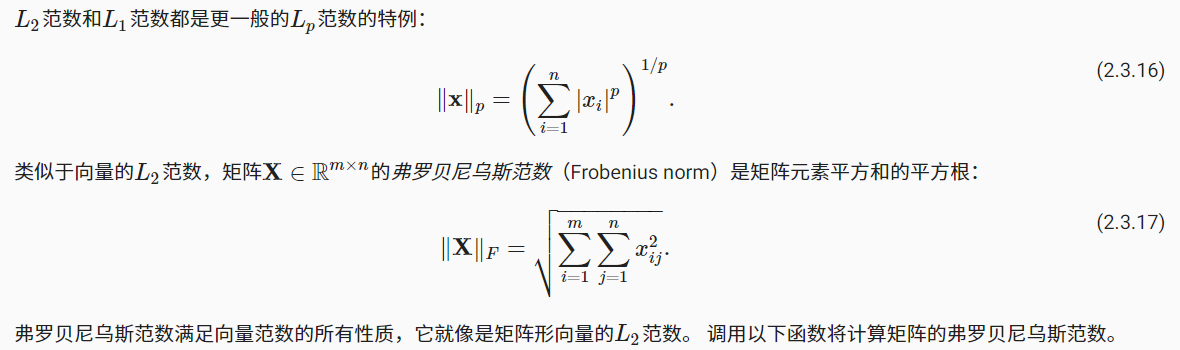

In [44]:
torch.ones((4, 9)), torch.norm(torch.ones((4, 9)))

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))